In [ ]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

## ON CORAL, RUN
# echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
# curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
# sudo apt-get update
# sudo apt-get install python3-tflite-runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Inference libraries
import tflite_runtime.interpreter as tflite
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Preprocessing libraries
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd

### **Use the flag below to toggle between PNG and NPY image inputs**

In [ ]:
USING_NPY_IMAGE = True
SAVE_IMAGES = True

ROOT_FOLDER = "/content/gdrive/MyDrive/CS329E Cloud Forecasting/"

In [ ]:
# EXECUTE BELOW WHEN USING NPY IMAGE INPUT
x_test_2 = data_pv = np.load(ROOT_FOLDER + "Data_jrse/ForecastData/pv_log_test.npy", allow_pickle=True)
num_points, num_timesteps, img_size, num_channels = 2542, 16, 64, 3
if USING_NPY_IMAGE:
  x_test_raw = np.load(ROOT_FOLDER + "Data_jrse/ForecastData/image_log_pred_test.npy")

  num_points, num_timesteps, img_size, _, num_channels = x_test_raw.shape

  print(x_test_raw.shape)
  print(x_test_2.shape)

  ## Show example image

  if SAVE_IMAGES:
    for n in range(2000, x_test_raw.shape[0]):
      print(n)
      # for i in range(x_test_raw.shape[1]):
      imageRGB = cv2.cvtColor(x_test_raw[n][15], cv2.COLOR_BGR2RGB)
      image = Image.fromarray(imageRGB)
      image.save(ROOT_FOLDER + "sample_2/image_n=" + str(n) + "_t=" + str(15- num_timesteps + 1) + ".png")
  x_test = x_test_raw

if not USING_NPY_IMAGE:

  x_test = np.empty((num_points, num_timesteps, img_size, img_size, num_channels))

  for n in range(num_points):
    print(n)
    for i in range(num_timesteps):
      image = Image.open(ROOT_FOLDER + "images_test/image_n=" + str(n) + "_t=" + str(i - num_timesteps + 1) + ".png")
      x_test_raw = np.array(image)
      x_test_raw = np.reshape(x_test_raw, (img_size, img_size, -1))
      x_test_raw = cv2.cvtColor(x_test_raw, cv2.COLOR_RGB2BGR)
      x_test[n][i] = x_test_raw

x_test = x_test / 255
image_data = np.transpose(x_test,[0,2,3,1,4])
image_data = np.reshape(image_data, [image_data.shape[0],image_data.shape[1],image_data.shape[2],-1])
x_test = image_data

x_test = np.float32(x_test)
x_test_2 = np.float32(x_test_2)
y_test = np.load(ROOT_FOLDER + "Data_jrse/ForecastData/pv_pred_test.npy", allow_pickle=True)

print(x_test.shape)
print(x_test_2.shape)
print(y_test.shape)

Running inference w/ Model #1...


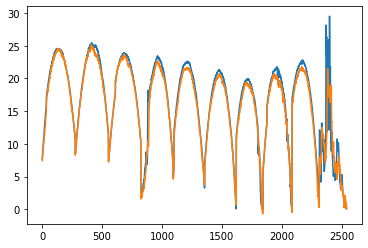

2.461601178195001
Running inference w/ Model #2...


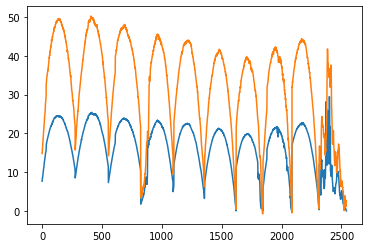

289.0570108709761
Running inference w/ Model #3...


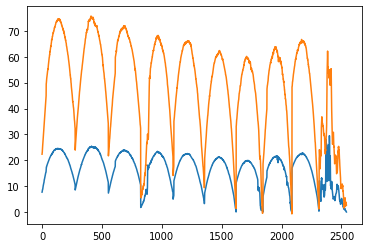

1186.7704315188084
Running inference w/ Model #4...


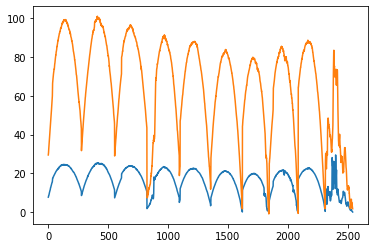

2693.036948878541
Running inference w/ Model #5...


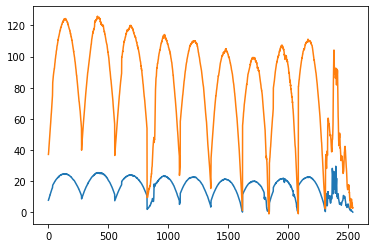

4801.037492746452
Running inference w/ Model #6...


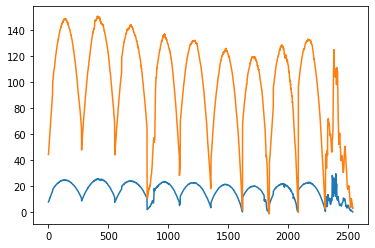

7546.294922448196
Running inference w/ Model #7...


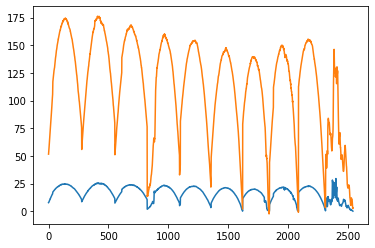

10890.601960517679
Running inference w/ Model #8...


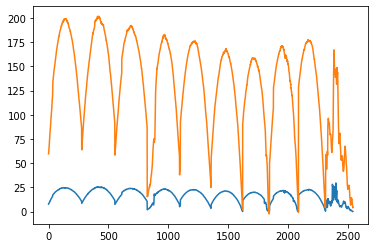

14808.906018191026
Running inference w/ Model #9...


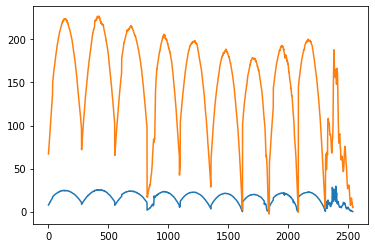

19323.03409525898
Running inference w/ Model #10...


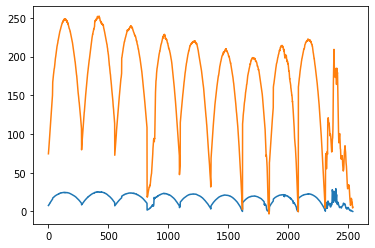

24482.820139894036


In [ ]:
num_models = 10
num_points = x_test.shape[0]
pred = np.zeros((num_points))

for model in range(num_models):
  # Load the TFLite model and allocate tensors.
  # interpreter = tflite.Interpreter(model_path = ROOT_FOLDER + "temp_model_dont_delete.tflite")
  interpreter = tflite.Interpreter(model_path=ROOT_FOLDER + "sunset_forecast_pretrained/CS329E_Pretrained_TFLITE_models/tf_lite_model" + str(model + 1) + ".tflite")
  interpreter.allocate_tensors()
  # Get input and output tensors.
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  print("Running inference w/ Model #" + str(model + 1) + "...")

  for i in range(num_points):
    input_img = np.expand_dims(x_test[i], axis=0)
    input_pv = np.expand_dims(x_test_2[i], axis=0)

    # print('Expected shape 0', input_details[0]['shape'])
    # print('Expected shape 1', input_details[1]['shape'])
    # print('Actual shape 0', input_img.shape)
    # print('Actual shape 1', input_pv.shape)

    interpreter.set_tensor(input_details[0]['index'], input_img)
    interpreter.set_tensor(input_details[1]['index'], input_pv)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred[i] += output_data
  
  plt.plot(y_test)
  plt.plot(pred)
  plt.show()
  
  print(mean_squared_error(y_test, pred))

Running inference w/ Model #1...
Running inference w/ Model #2...
Running inference w/ Model #3...
Running inference w/ Model #4...
Running inference w/ Model #5...
Running inference w/ Model #6...
Running inference w/ Model #7...
Running inference w/ Model #8...
Running inference w/ Model #9...
Running inference w/ Model #10...


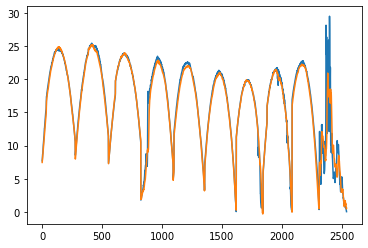

In [ ]:
num_models = 10
num_points = x_test.shape[0]
pred = np.zeros((num_points))

for model in range(num_models):
  # Load the TFLite model and allocate tensors.
  # interpreter = tflite.Interpreter(model_path = ROOT_FOLDER + "temp_model_dont_delete.tflite")
  interpreter = tflite.Interpreter(model_path=ROOT_FOLDER + "sunset_forecast_pretrained/CS329E_Pretrained_TFLITE_models/tf_lite_model" + str(model + 1) + ".tflite")
  interpreter.allocate_tensors()
  # Get input and output tensors.
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  print("Running inference w/ Model #" + str(model + 1) + "...")

  for i in range(num_points):
    input_img = np.expand_dims(x_test[i], axis=0)
    input_pv = np.expand_dims(x_test_2[i], axis=0)

    # print('Expected shape 0', input_details[0]['shape'])
    # print('Expected shape 1', input_details[1]['shape'])
    # print('Actual shape 0', input_img.shape)
    # print('Actual shape 1', input_pv.shape)

    interpreter.set_tensor(input_details[0]['index'], input_img)
    interpreter.set_tensor(input_details[1]['index'], input_pv)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred[i] += output_data
pred = pred / num_models
plt.plot(y_test)
plt.plot(pred)

In [ ]:
pd.DataFrame(y_test).to_csv(ROOT_FOLDER + "y_test.csv")
pd.DataFrame(pred).to_csv(ROOT_FOLDER + "pred.csv")

In [ ]:
mean_squared_error(y_test, pred)

2.1828212872200004

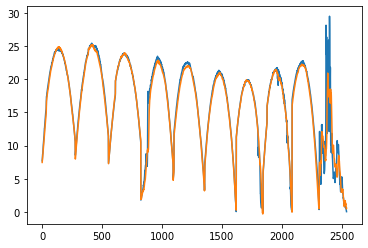

In [ ]:
plt.plot(y_test)
plt.plot(pred)

2537
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, Fals

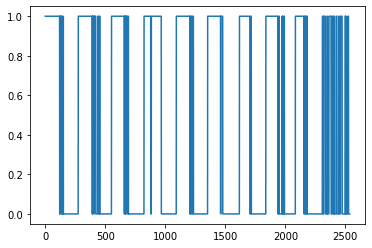

In [ ]:
diff = [t - s for s, t in zip(pred, pred[1:])]

consensus = []
for i in range(len(diff) - 5 + 1):
  num = 0
  for j in range(5):
    if diff[i + j] > 0:
      num = num + 1
  if num >= 3:
    consensus.append(True)
  else:
    consensus.append(False)
print(len(consensus))
print(consensus)

# First element of consensus corresponds to the first five "diffs", which are calculated using n = 0 to n = 5 inclusive.

pd.Series(consensus).astype(float).plot()